# 보너스 악용형(Bonus Abuse Pattern)

## 사전세팅

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!pip install koreanize-matplotlib --quiet
import matplotlib.pyplot as plt
import koreanize_matplotlib
koreanize_matplotlib.koreanize()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/HSU/25-2/싱가포르/data/Reward.csv')
display(df.head())

,account_id,ts,reward_amount
0,A_f96ede8d34,2025-01-02 08:14:06.194179,6.843929
1,A_f96ede8d34,2025-01-02 08:14:06.241981,6.938105
2,A_2db64f326b,2025-01-02 08:15:13.284073,6.843929
3,A_2db64f326b,2025-01-02 08:15:13.381792,6.938105
4,A_f96ede8d34,2025-01-03 07:32:10.198387,7.036313


In [4]:
#csv 파일을 각각 data라는 딕셔너리에 저장하고 보여줌
import os
import pandas as pd

data_dir = '/content/drive/MyDrive/HSU/25-2/싱가포르/data/'

# Dictionary to store DataFrames
data = {}

# List all files in the directory
if os.path.exists(data_dir):
    for filename in os.listdir(data_dir):
        if filename.endswith('.csv'):
            filepath = os.path.join(data_dir, filename)
            df_name = os.path.splitext(filename)[0] # Use filename without extension as key
            print(f"Loading {filename}...")
            try:
                data[df_name] = pd.read_csv(filepath)
                print(f"Successfully loaded '{df_name}'. First 5 rows:")
                display(data[df_name].head())
                print("\n" + "-"*30 + "\n") # Separator for better readability
            except Exception as e:
                print(f"Error loading {filename}: {e}")
else:
    print(f"Directory not found: {data_dir}")

# 개별 DataFrame 변수로 꺼내 쓰기
Reward = data['Reward']
Trade = data['Trade']
IP = data['IP']
Spec = data['Spec']
# You can access your DataFrames like this:
# 예를 들어, 'my_data.csv'가 있다면 data['my_data']로 접근합니다.
# print(data.keys()) # To see all loaded DataFrame names

Loading Reward.csv...
Successfully loaded 'Reward'. First 5 rows:


,account_id,ts,reward_amount
0,A_f96ede8d34,2025-01-02 08:14:06.194179,6.843929
1,A_f96ede8d34,2025-01-02 08:14:06.241981,6.938105
2,A_2db64f326b,2025-01-02 08:15:13.284073,6.843929
3,A_2db64f326b,2025-01-02 08:15:13.381792,6.938105
4,A_f96ede8d34,2025-01-03 07:32:10.198387,7.036313



------------------------------

Loading Funding.csv...
Successfully loaded 'Funding'. First 5 rows:


,account_id,ts,fee_rate,funding_fee
0,A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
1,A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
2,A_40cfe40ac2,2025-03-01 00:00:00.806171,0.000100,-0.065085
3,A_7e27164ab6,2025-03-01 00:00:00.889929,0.000022,0.000403
4,A_ebdb869fd3,2025-03-01 00:00:00.889929,0.000022,0.000037



------------------------------

Loading Trade.csv...
Successfully loaded 'Trade'. First 5 rows:


,account_id,ts,symbol,side,openclose,position_id,leverage,price,qty,amount
0,A_c668740478,2025-03-01 00:04:14.329767,BTCUSDT.PERP,LONG,OPEN,P_9ecd54214c,50,84303.5,0.177839,14992.450136
1,A_c668740478,2025-03-01 00:09:08.199617,BTCUSDT.PERP,LONG,CLOSE,P_9ecd54214c,0,84321.0,0.177839,14995.562319
2,A_7e27164ab6,2025-03-01 00:23:25.371503,BTCUSDT.PERP,LONG,OPEN,P_fbe21fd2c4,2,84369.2,0.002787,235.136960
3,A_c668740478,2025-03-01 00:30:03.218306,BTCUSDT.PERP,LONG,OPEN,P_9567d3d1d3,50,84243.3,0.178533,15040.209079
4,A_c668740478,2025-03-01 00:34:38.392647,BTCUSDT.PERP,LONG,CLOSE,P_9567d3d1d3,0,84121.0,0.178533,15018.374493



------------------------------

Loading IP.csv...
Successfully loaded 'IP'. First 5 rows:


,account_id,ip
0,A_1f97e16953,100.222.49.58
1,A_946b028740,18.96.95.89
2,A_78e950c1a2,13.120.90.27
3,A_0e72128b0d,190.83.18.146
4,A_0ad0445c5a,11.179.9.226



------------------------------

Loading Spec.csv...
Successfully loaded 'Spec'. First 5 rows:


,symbol,day,funding_interval,max_order_amount
0,IMXUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
1,MOVEUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
2,SXPUSDT.PERP,2025-03-01 00:00:00.000000,8,75000.0
3,PONKEUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0
4,KDAUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0



------------------------------



In [5]:
#spec.csv를 제외하고 account_id를 인덱스로 설정
for df_name, df in data.items():
    if df_name != 'Spec':
        if 'account_id' in df.columns:
            print(f"Setting 'account_id' as index for '{df_name}' DataFrame...")
            data[df_name] = df.set_index('account_id')
            print(f"Updated '{df_name}' DataFrame. First 5 rows with new index:")
            display(data[df_name].head())
            print("\n" + "-"*30 + "\n")
        else:
            print(f"Warning: 'account_id' column not found in '{df_name}' DataFrame. Skipping index setting.")
    else:
        print(f"Skipping 'Spec' DataFrame as requested. First 5 rows:")
        display(data[df_name].head())
        print("\n" + "-"*30 + "\n")

Setting 'account_id' as index for 'Reward' DataFrame...
Updated 'Reward' DataFrame. First 5 rows with new index:


,ts,reward_amount
account_id,,
A_f96ede8d34,2025-01-02 08:14:06.194179,6.843929
A_f96ede8d34,2025-01-02 08:14:06.241981,6.938105
A_2db64f326b,2025-01-02 08:15:13.284073,6.843929
A_2db64f326b,2025-01-02 08:15:13.381792,6.938105
A_f96ede8d34,2025-01-03 07:32:10.198387,7.036313



------------------------------

Setting 'account_id' as index for 'Funding' DataFrame...
Updated 'Funding' DataFrame. First 5 rows with new index:


,ts,fee_rate,funding_fee
account_id,,,
A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
A_40cfe40ac2,2025-03-01 00:00:00.806171,0.000100,-0.065085
A_7e27164ab6,2025-03-01 00:00:00.889929,0.000022,0.000403
A_ebdb869fd3,2025-03-01 00:00:00.889929,0.000022,0.000037



------------------------------

Setting 'account_id' as index for 'Trade' DataFrame...
Updated 'Trade' DataFrame. First 5 rows with new index:


,ts,symbol,side,openclose,position_id,leverage,price,qty,amount
account_id,,,,,,,,,
A_c668740478,2025-03-01 00:04:14.329767,BTCUSDT.PERP,LONG,OPEN,P_9ecd54214c,50,84303.5,0.177839,14992.450136
A_c668740478,2025-03-01 00:09:08.199617,BTCUSDT.PERP,LONG,CLOSE,P_9ecd54214c,0,84321.0,0.177839,14995.562319
A_7e27164ab6,2025-03-01 00:23:25.371503,BTCUSDT.PERP,LONG,OPEN,P_fbe21fd2c4,2,84369.2,0.002787,235.136960
A_c668740478,2025-03-01 00:30:03.218306,BTCUSDT.PERP,LONG,OPEN,P_9567d3d1d3,50,84243.3,0.178533,15040.209079
A_c668740478,2025-03-01 00:34:38.392647,BTCUSDT.PERP,LONG,CLOSE,P_9567d3d1d3,0,84121.0,0.178533,15018.374493



------------------------------

Setting 'account_id' as index for 'IP' DataFrame...
Updated 'IP' DataFrame. First 5 rows with new index:


,ip
account_id,
A_1f97e16953,100.222.49.58
A_946b028740,18.96.95.89
A_78e950c1a2,13.120.90.27
A_0e72128b0d,190.83.18.146
A_0ad0445c5a,11.179.9.226



------------------------------

Skipping 'Spec' DataFrame as requested. First 5 rows:


,symbol,day,funding_interval,max_order_amount
0,IMXUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
1,MOVEUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
2,SXPUSDT.PERP,2025-03-01 00:00:00.000000,8,75000.0
3,PONKEUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0
4,KDAUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0



------------------------------



In [6]:
#spec에서 symbol을 인덱스로 설정
if 'Spec' in data and 'symbol' in data['Spec'].columns:
    print("Setting 'symbol' as index for 'Spec' DataFrame...")
    data['Spec'] = data['Spec'].set_index('symbol')
    print("Updated 'Spec' DataFrame. First 5 rows with new index:")
    display(data['Spec'].head())
else:
    print("Error: 'Spec' DataFrame not found or 'symbol' column not in 'Spec' DataFrame.")

Setting 'symbol' as index for 'Spec' DataFrame...
Updated 'Spec' DataFrame. First 5 rows with new index:


,day,funding_interval,max_order_amount
symbol,,,
IMXUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
MOVEUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
SXPUSDT.PERP,2025-03-01 00:00:00.000000,8,75000.0
PONKEUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0
KDAUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0


In [7]:
import os
import pandas as pd

data_dir = '/content/drive/MyDrive/HSU/25-2/싱가포르/data/'
data = {}

if os.path.exists(data_dir):
    for filename in os.listdir(data_dir):
        if filename.endswith('.csv'):
            filepath = os.path.join(data_dir, filename)
            df_name = os.path.splitext(filename)[0]
            data[df_name] = pd.read_csv(filepath)
            print(f"Loaded {df_name}")
else:
    print("Data directory not found")


Loaded Reward
Loaded Funding
Loaded Trade
Loaded IP
Loaded Spec


## 📌 보너스 지급 시점 전후 거래활동 매칭 및 이상 거래 후보 탐지

In [8]:
from datetime import timedelta
import pandas as pd

# 1️⃣ 데이터 전처리: ts 컬럼을 datetime으로 변환
data['Reward']['ts'] = pd.to_datetime(data['Reward']['ts'])
data['Trade']['ts'] = pd.to_datetime(data['Trade']['ts'])

# 2️⃣ 공통 계정 식별
reward_accounts = set(data['Reward']['account_id'].unique())
trade_accounts = set(data['Trade']['account_id'].unique())
common_accounts = reward_accounts.intersection(trade_accounts)

print(f"Reward 계정 수: {len(reward_accounts)}")
print(f"Trade 계정 수: {len(trade_accounts)}")
print(f"공통 계정 수: {len(common_accounts)}")

# 3️⃣ 보너스 ±30분 내 거래 계산
results = []

for acc in common_accounts:
    reward_rows = data['Reward'][data['Reward']['account_id'] == acc]
    trade_rows = data['Trade'][data['Trade']['account_id'] == acc]

    for _, row in reward_rows.iterrows():
        reward_time = row['ts']
        start = reward_time - timedelta(minutes=30)
        end = reward_time + timedelta(minutes=30)

        # ±30분 내 거래 필터링
        nearby_trades = trade_rows[(trade_rows['ts'] >= start) & (trade_rows['ts'] <= end)]

        results.append({
            'account_id': acc,
            'reward_time': reward_time,
            'reward_amount': row['reward_amount'],
            'trade_count_±30m': len(nearby_trades),
            'total_trade_amount': nearby_trades['amount'].sum(),
            'avg_trade_amount': nearby_trades['amount'].mean() if len(nearby_trades) > 0 else 0
        })

# 4️⃣ 보너스 이벤트 단위 결과 (그대로 유지)
df_common_match = pd.DataFrame(results)
print(f"\n공통 계정 매칭 결과: {len(df_common_match)}개 보너스 이벤트")
display(df_common_match.head(10))

# 5️⃣ 거래가 실제로 있었던 이벤트만 추출
active_after_reward = df_common_match[df_common_match['trade_count_±30m'] > 0]
print(f"보너스 후 ±30분 내 거래가 있었던 계정 수: {active_after_reward['account_id'].nunique()}개")
display(active_after_reward.head(10))

# 6️⃣ 계정 단위로 집계 (핵심 개선)
account_summary = (
    active_after_reward.groupby('account_id')
    .agg(
        total_rewards=('reward_amount', 'count'),          # 받은 보너스 횟수
        total_reward_amount=('reward_amount', 'sum'),      # 총 보너스 금액
        total_trade_after_reward=('trade_count_±30m', 'sum'),  # ±30분 내 거래 횟수 합
        total_trade_amount=('total_trade_amount', 'sum'),  # ±30분 내 거래 금액 총합
        avg_trade_amount=('avg_trade_amount', 'mean')      # 평균 거래금액(평균의 평균)
    )
    .reset_index()
    .sort_values('total_trade_after_reward', ascending=False)
)

print("\n📊 계정 단위 보너스 후 거래 요약")
display(account_summary.head(10))

# 7️⃣ 이상 거래 의심 계정 탐지
# 1. 보너스를 받은지 30분 이내에 보너스를 최소 2번 이상 받고, 보너스 후 거래가 10번 이상이거나 금액이 1,000,000인 경우
THRESHOLD_REWARD_COUNT = 2
THRESHOLD_TRADE_COUNT = 10
THRESHOLD_TRADE_AMOUNT = 1e6  # 1,000,000

suspicious_accounts = account_summary[
    (account_summary['total_rewards'] >= THRESHOLD_REWARD_COUNT) &
    ((account_summary['total_trade_after_reward'] >= THRESHOLD_TRADE_COUNT) |
     (account_summary['total_trade_amount'] >= THRESHOLD_TRADE_AMOUNT))
]

print(f"\n🚨 이상 거래 의심 계정 수: {len(suspicious_accounts)}개")
display(suspicious_accounts)


Reward 계정 수: 49
Trade 계정 수: 63
공통 계정 수: 49

공통 계정 매칭 결과: 198개 보너스 이벤트


,account_id,reward_time,reward_amount,trade_count_±30m,total_trade_amount,avg_trade_amount
0,A_3b4f58349f,2025-06-18 08:34:19.425621,20.000000,0,0.0,0.0
1,A_3b4f58349f,2025-06-22 08:52:18.280191,10.000000,0,0.0,0.0
2,A_c91db6cabf,2025-02-28 04:04:33.164910,4.912100,0,0.0,0.0
3,A_c91db6cabf,2025-02-28 08:53:44.565233,190.000000,0,0.0,0.0
4,A_c91db6cabf,2025-03-01 07:33:28.359024,190.000000,0,0.0,0.0
5,A_c91db6cabf,2025-03-01 16:46:08.324062,100.000000,0,0.0,0.0
6,A_c91db6cabf,2025-03-06 14:24:33.123600,50.000000,0,0.0,0.0
7,A_0bfb0b4311,2025-02-16 14:05:38.141159,10.000000,0,0.0,0.0
8,A_8860be39b3,2025-06-22 06:16:38.273176,10.000000,0,0.0,0.0
9,A_ebdb869fd3,2025-01-03 12:00:14.573331,9.991358,0,0.0,0.0


보너스 후 ±30분 내 거래가 있었던 계정 수: 16개


,account_id,reward_time,reward_amount,trade_count_±30m,total_trade_amount,avg_trade_amount
10,A_ebdb869fd3,2025-03-24 09:15:38.847558,50.000000,1,9.995756e+01,99.957558
11,A_ebdb869fd3,2025-06-13 08:41:05.563159,100.000000,2,4.498982e+01,22.494909
12,A_6960c2ee08,2025-06-10 11:36:23.502482,10.000000,2,1.001025e+04,5005.125206
17,A_55021b4ae2,2025-03-07 14:05:07.170080,4.898770,7,3.111569e+04,4445.098543
40,A_06d5bd3da9,2025-07-10 02:15:39.311329,10.000000,3,2.411066e+04,8036.888289
53,A_f2ab53d645,2025-03-27 09:06:36.390352,31.771412,1,3.822480e+03,3822.480200
93,A_78e950c1a2,2025-04-03 03:07:19.274912,5.783066,10,9.999165e+03,999.916475
119,A_7e27164ab6,2025-03-27 09:05:29.692050,31.780412,1,6.252425e+01,62.524248
120,A_7e27164ab6,2025-03-28 13:03:50.180594,31.780148,1,6.601331e+01,66.013311
124,A_7e27164ab6,2025-09-10 08:01:29.620010,9.996940,8,1.886994e+06,235874.252918



📊 계정 단위 보너스 후 거래 요약


,account_id,total_rewards,total_reward_amount,total_trade_after_reward,total_trade_amount,avg_trade_amount
12,A_cab220ef3c,2,699.992995,20,4.671257e+05,212106.992365
8,A_78e950c1a2,1,5.783066,10,9.999165e+03,999.916475
9,A_7e27164ab6,3,73.557500,10,1.887123e+06,78667.596826
5,A_55021b4ae2,1,4.898770,7,3.111569e+04,4445.098543
3,A_4943ad62b4,3,26.432407,5,6.503602e+03,1300.366829
14,A_ebdb869fd3,2,150.000000,3,1.449474e+02,61.226233
0,A_06d5bd3da9,1,10.000000,3,2.411066e+04,8036.888289
1,A_1a7c006b71,1,7.497396,2,9.344769e+03,4672.384546
11,A_c462ca9c6b,2,43.344334,2,2.008141e+04,10040.705180
7,A_6960c2ee08,1,10.000000,2,1.001025e+04,5005.125206



🚨 이상 거래 의심 계정 수: 2개


,account_id,total_rewards,total_reward_amount,total_trade_after_reward,total_trade_amount,avg_trade_amount
12,A_cab220ef3c,2,699.992995,20,4.671257e+05,212106.992365
9,A_7e27164ab6,3,73.557500,10,1.887123e+06,78667.596826


## 🌐 IP 기반 이상 거래 탐지 (다계정 및 보너스 악용 패턴 분석)

In [10]:
import pandas as pd

# ----------------------------------------
# 1️⃣ Trade, IP 데이터 병합
# ----------------------------------------
# Trade(account_id, ts, amount) + IP(account_id, ip)
Trade_ip = Trade.merge(IP, on='account_id', how='left')

# 혹시 ip 정보가 없는 거래 건수를 체크
missing_ip = Trade_ip['ip'].isna().sum()
print(f"IP 정보가 없는 거래 건수: {missing_ip:,}건")

# ----------------------------------------
# 2️⃣ IP별 거래 통계 계산
# ----------------------------------------
ip_summary = (
    Trade_ip.groupby('ip')
    .agg(
        trade_count=('amount', 'count'),
        total_trade_amount=('amount', 'sum'),
        unique_accounts=('account_id', 'nunique')
    )
    .reset_index()
    .sort_values('trade_count', ascending=False)
)

# 동일 IP에서 2개 이상 계정이 거래한 경우만 추출
shared_ip = ip_summary[ip_summary['unique_accounts'] > 1]

print(f"\n🌐 동일 IP에서 거래한 계정이 2개 이상인 IP 수: {len(shared_ip)}개")
display(shared_ip.head(10))

# ----------------------------------------
# 3️⃣ 보너스 이후 거래(active_after_reward)와 IP 연결
# ----------------------------------------
# active_after_reward(account_id, reward_time, trade_count_±30m ...) + IP(ip)
active_after_reward_ip = active_after_reward.merge(IP, on='account_id', how='left')

# IP별 보너스 후 거래량 요약
bonus_ip_summary = (
    active_after_reward_ip.groupby('ip')
    .agg(
        total_reward_events=('account_id', 'count'),
        total_trade_after_bonus=('trade_count_±30m', 'sum'),
        unique_accounts=('account_id', 'nunique'),
        avg_trade_after_bonus=('trade_count_±30m', 'mean')
    )
    .reset_index()
    .sort_values('total_trade_after_bonus', ascending=False)
)

print(f"\n💰 보너스 이후 거래가 집중된 IP 수: {len(bonus_ip_summary)}개")
display(bonus_ip_summary)

# ----------------------------------------
# 4️⃣ IP별 계정 목록 확인 (조직적 패턴 탐색용)
# ----------------------------------------
def list_accounts_per_ip(ip):
    accs = IP[IP['ip'] == ip]['account_id'].unique()
    return list(accs)

# 예시: 상위 3개 공유 IP에서 활동한 계정들 출력
for ip in shared_ip['ip'].head(3):
    acc_list = list_accounts_per_ip(ip)
    print(f"\n🔍 IP {ip} 사용 계정 {len(acc_list)}개:")
    print(acc_list)

suspicious_bonus_ip = bonus_ip_summary[
    (bonus_ip_summary['unique_accounts'] > 1) |  # 여러 계정이 같은 IP
    (bonus_ip_summary['total_trade_after_bonus'] > 10)  # 보너스 후 거래 과도
]
print("🚨 이상 거래 의심 IP 수:", len(suspicious_bonus_ip))
display(suspicious_bonus_ip)


IP 정보가 없는 거래 건수: 0건

🌐 동일 IP에서 거래한 계정이 2개 이상인 IP 수: 9개


,ip,trade_count,total_trade_amount,unique_accounts
902,194.23.90.110,4367,5.075434e+07,2
1654,44.180.24.95,3203,3.431565e+05,2
1749,53.162.59.233,3141,9.170564e+07,2
1756,54.132.225.149,1762,7.374208e+06,2
727,177.237.144.102,1242,2.363577e+07,2
1037,208.29.138.40,1206,5.536737e+07,2
880,192.167.6.144,467,1.256501e+08,2
1955,72.35.190.19,306,2.346801e+07,3
89,107.249.78.206,107,6.501842e+06,2



💰 보너스 이후 거래가 집중된 IP 수: 738개


,ip,total_reward_events,total_trade_after_bonus,unique_accounts,avg_trade_after_bonus
349,206.73.199.208,2,20,1,10.0
355,207.88.25.173,2,20,1,10.0
358,209.108.91.216,2,20,1,10.0
63,12.26.8.39,2,20,1,10.0
17,103.62.83.51,2,20,1,10.0
...,...,...,...,...,...
51,116.187.203.182,1,1,1,1.0
60,12.204.147.13,1,1,1,1.0
30,108.41.187.48,1,1,1,1.0
720,90.77.146.203,1,1,1,1.0



🔍 IP 194.23.90.110 사용 계정 2개:
['A_946b028740', 'A_0bfb0b4311']

🔍 IP 44.180.24.95 사용 계정 2개:
['A_9a5e1e7fac', 'A_ebdb869fd3']

🔍 IP 53.162.59.233 사용 계정 2개:
['A_4081f88bb0', 'A_c462ca9c6b']
🚨 이상 거래 의심 IP 수: 26


,ip,total_reward_events,total_trade_after_bonus,unique_accounts,avg_trade_after_bonus
349,206.73.199.208,2,20,1,10.0
355,207.88.25.173,2,20,1,10.0
358,209.108.91.216,2,20,1,10.0
63,12.26.8.39,2,20,1,10.0
17,103.62.83.51,2,20,1,10.0
693,83.190.209.149,2,20,1,10.0
207,166.173.194.119,2,20,1,10.0
522,32.54.131.122,2,20,1,10.0
521,32.194.245.136,2,20,1,10.0
537,38.119.151.149,2,20,1,10.0


## 🎨 보너스 악용형 거래 패턴 시각화

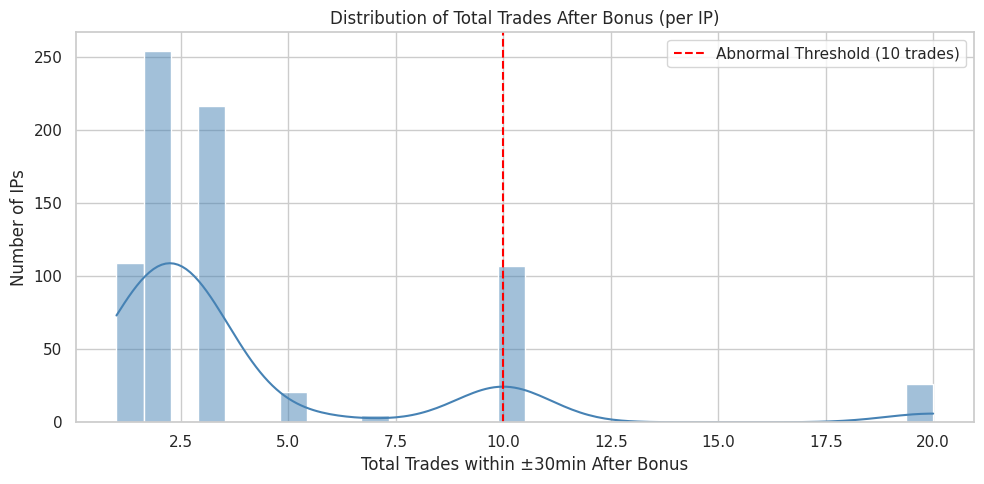

📊 해석:
대부분의 IP는 보너스 후 10건 이하의 거래만 하지만,
빨간선을 넘는 일부 IP는 보너스 직후 거래가 과도하게 발생함 → 자동거래(bot) 의심.



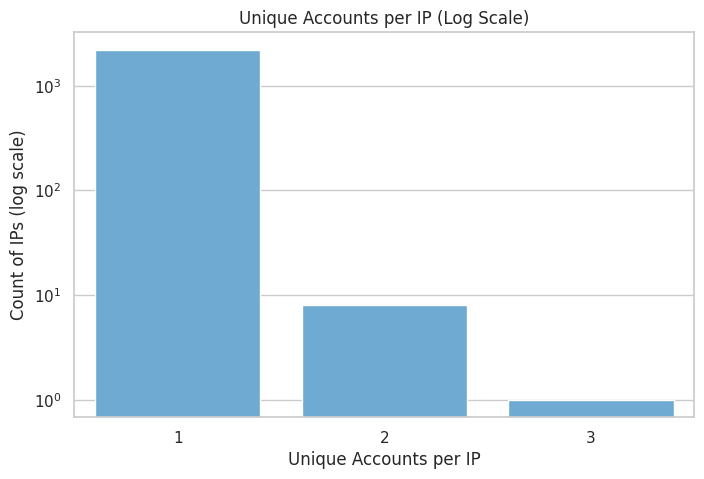

📊 해석:
이 그래프는 '전체 거래 데이터' 기준으로, 한 IP에서 몇 개의 계정이 거래했는지를 보여줍니다.
- 대부분의 IP가 한 계정만 사용하는 경우: 정상적인 개인 사용자 패턴.
- 일부 IP가 2개 이상 계정을 사용하는 경우: 다계정 또는 조직적 거래 가능성이 있음.


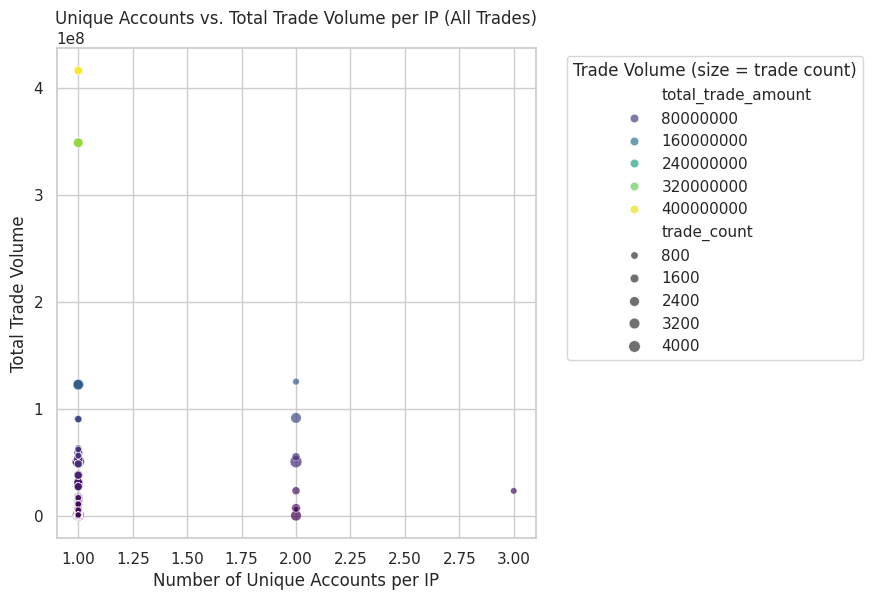

📊 해석:
이 그래프는 전체 거래 기준으로 IP별 계정 수와 거래 금액의 관계를 나타냅니다.
- x축: 한 IP에서 거래한 고유 계정 수 (1은 단일 계정, 2 이상은 다계정).
- y축: 해당 IP에서 발생한 전체 거래 금액.
- 점의 크기: 거래 횟수, 색상: 거래 금액 크기.
→ 오른쪽 위에 있는 IP일수록 여러 계정이 동시에 많은 거래를 수행한 IP로 의심됩니다.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 스타일 세팅
sns.set(style="whitegrid")
plt.rcParams['axes.unicode_minus'] = False  # 음수 표시 깨짐 방지

# -------------------------------------------------------
# 1️⃣ 보너스 후 거래량 분포 (전체 IP 기준)
# -------------------------------------------------------
plt.figure(figsize=(10,5))
sns.histplot(bonus_ip_summary['total_trade_after_bonus'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Total Trades After Bonus (per IP)")
plt.xlabel("Total Trades within ±30min After Bonus")
plt.ylabel("Number of IPs")
plt.axvline(10, color='red', linestyle='--', label='Abnormal Threshold (10 trades)')
plt.legend()
plt.tight_layout()
plt.show()

print("📊 해석:")
print("대부분의 IP는 보너스 후 10건 이하의 거래만 하지만,")
print("빨간선을 넘는 일부 IP는 보너스 직후 거래가 과도하게 발생함 → 자동거래(bot) 의심.\n")

# -------------------------------------------------------
# 2️⃣ IP별 고유 계정 수 분포 (다계정 탐지)
# -------------------------------------------------------
plt.figure(figsize=(8,5))
sns.countplot(x='unique_accounts', data=ip_summary, color='#5DADE2')
plt.yscale('log')
plt.title("Unique Accounts per IP (Log Scale)")
plt.xlabel("Unique Accounts per IP")
plt.ylabel("Count of IPs (log scale)")
plt.show()

print("📊 해석:")
print("이 그래프는 '전체 거래 데이터' 기준으로, 한 IP에서 몇 개의 계정이 거래했는지를 보여줍니다.")
print("- 대부분의 IP가 한 계정만 사용하는 경우: 정상적인 개인 사용자 패턴.")
print("- 일부 IP가 2개 이상 계정을 사용하는 경우: 다계정 또는 조직적 거래 가능성이 있음.")

# -------------------------------------------------------
# 3️⃣ IP별 계정 수 vs 거래량 (산점도)
# -------------------------------------------------------
plt.figure(figsize=(9,6))
sns.scatterplot(
    data=ip_summary,                   # 전체 거래 데이터
    x='unique_accounts',               # IP별 고유 계정 수
    y='total_trade_amount',            # 전체 거래 금액
    size='trade_count',                # 거래 횟수 (점 크기)
    hue='total_trade_amount',          # 거래 금액 색상으로 표시
    palette='viridis',
    alpha=0.7
)
plt.title("Unique Accounts vs. Total Trade Volume per IP (All Trades)")
plt.xlabel("Number of Unique Accounts per IP")
plt.ylabel("Total Trade Volume")
plt.legend(title="Trade Volume (size = trade count)", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

print("📊 해석:")
print("이 그래프는 전체 거래 기준으로 IP별 계정 수와 거래 금액의 관계를 나타냅니다.")
print("- x축: 한 IP에서 거래한 고유 계정 수 (1은 단일 계정, 2 이상은 다계정).")
print("- y축: 해당 IP에서 발생한 전체 거래 금액.")
print("- 점의 크기: 거래 횟수, 색상: 거래 금액 크기.")
print("→ 오른쪽 위에 있는 IP일수록 여러 계정이 동시에 많은 거래를 수행한 IP로 의심됩니다.")